In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import evaluate
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding, EarlyStoppingCallback
from datasets import Dataset
import torch
from torch import nn
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [ ]:
file_path = "/content/drive/My Drive/Shared_task/train.parquet"
df = pd.read_parquet(file_path)

# Display the first few rows
df.sample(5)

,id,content,lang,manipulative,techniques,trigger_words
1584,80ab8e9d-2594-47c1-a3bf-ea215a97204c,Эй \n💩\nЦИПСО!!! \nСпустите хохлам методичку к...,ru,True,[loaded_language],"[[25, 31], [93, 98]]"
987,c6868201-21dc-4901-9026-761015ad686e,🔰\nСьогодні виповнюється 9 років славетному пі...,uk,True,"[loaded_language, euphoria]","[[32, 42], [238, 260], [630, 656], [898, 919]]"
483,b7de25d9-fa3d-405c-9616-0080e8cf3b74,⚡️\nРежим контртерористичної операції введено ...,uk,False,None,None
1973,755ce933-a407-46f9-b089-ed4ae9174507,Более сотни бойцов ЧВК Вагнер в Беларуси перем...,ru,False,None,None
1012,8b0500a8-d4b7-49be-b5d8-ed055f6bf737,"Для тех кто умеет думать, а не жевать. \nВ это...",ru,True,"[cliche, loaded_language]","[[0, 37], [40, 78], [80, 117], [120, 152], [15..."


In [ ]:
df['techniques'] = df['techniques'].apply(lambda x: x if x is not None else ['safe'])

In [ ]:
df

,id,content,lang,manipulative,techniques,trigger_words
0,0bb0c7fa-101b-4583-a5f9-9d503339141c,Новий огляд мапи DeepState від російського вій...,uk,True,"[euphoria, loaded_language]","[[27, 63], [65, 88], [90, 183], [186, 308]]"
1,7159f802-6f99-4e9d-97bd-6f565a4a0fae,Недавно 95 квартал жёстко поглумился над русск...,ru,True,"[loaded_language, cherry_picking]","[[0, 40], [123, 137], [180, 251], [253, 274]]"
2,e6a427f1-211f-405f-bd8b-70798458d656,🤩\nТим часом йде евакуація Бєлгородського авто...,uk,True,"[loaded_language, euphoria]","[[55, 100]]"
3,1647a352-4cd3-40f6-bfa1-d87d42e34eea,В Україні найближчим часом мають намір посилит...,uk,False,[safe],None
4,9c01de00-841f-4b50-9407-104e9ffb03bf,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",ru,True,[loaded_language],"[[114, 144]]"
...,...,...,...,...,...,...
3817,0e5dd135-ef41-48d3-b274-faedf3a2126c,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,uk,True,"[loaded_language, euphoria]","[[2, 7], [43, 75], [77, 143], [145, 178], [340..."
3818,08e6772a-9793-4ec9-babd-2a9e0e8b31f9,"К слову, Бабий не просто «ларечник», а и челов...",ru,True,[loaded_language],"[[25, 35], [103, 128], [149, 166]]"
3819,d7cfa984-46f2-450d-b4ec-28a0b5d93756,"Глава ФСБ Бортников ответил журналистам, почем...",ru,False,[safe],None
3820,4256b2b8-43bc-4d90-95c4-5fb25f1ab0e3,В ДНР завозили наркотики в бытовой технике\nОб...,ru,False,[safe],None


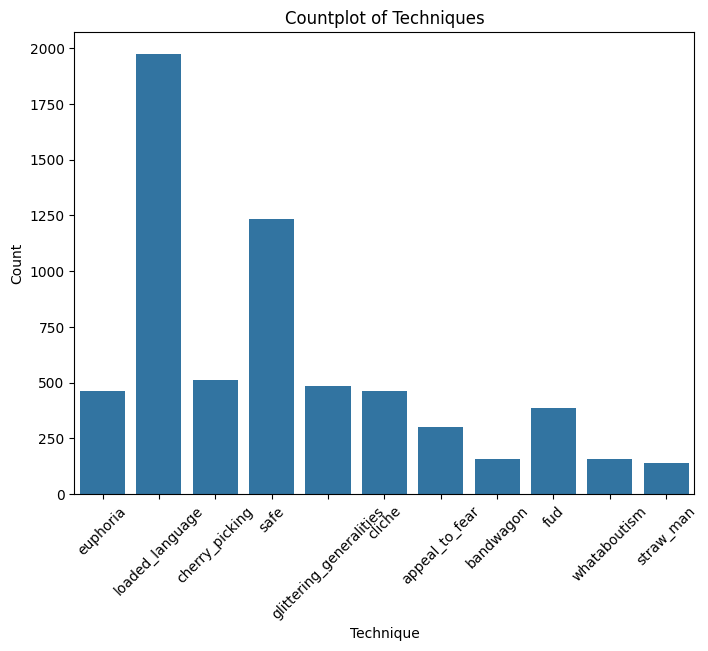

In [ ]:
df_exploded = df['techniques'].explode()

# Plot countplot for the exploded 'techniques' column
plt.figure(figsize=(8, 6))
sns.countplot(x=df_exploded)
plt.title('Countplot of Techniques')
plt.xlabel('Technique')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_dropped = df.drop(columns= ['trigger_words', 'id', 'manipulative', 'lang'])

In [ ]:
df = df_dropped.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df

,content,techniques
0,⚡️\nУ Черкасах на деяких вулицях немає електро...,[safe]
1,💥\n \nБроневики и танки разнесло на куски:\n к...,"[loaded_language, euphoria]"
2,"Гвардійці з Бахмута передають, що все стабільн...",[cliche]
3,❗️\nМолдавские парламентарии поднимут на засед...,[cherry_picking]
4,ПЗДЦ: напоили 7-летнего ребенка алкашкой\n в К...,[loaded_language]
...,...,...
3817,Просто зброя…\nВійськова стратегія постачання ...,[cherry_picking]
3818,"🤡\n \n""Я в бешенстве, русский город утюжат"", -...",[loaded_language]
3819,📌\n Невдовзі парламент голосуватиме законопроє...,[safe]
3820,«Киев готовит \nХарьков\n и \nСумы\n к сдаче»\...,"[loaded_language, cliche]"


In [ ]:
# Extract unique techniques (labels) from the 'techniques' column
unique_labels = sorted(set([label for sublist in df['techniques'] for label in sublist]))

# Create a mapping from label to index for multi-hot encoding
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# Function to convert the list of techniques into a multi-hot encoded vector
def multi_hot_encode(techniques, label_to_index):
    multi_hot_vector = [0] * len(label_to_index)
    for technique in techniques:
        multi_hot_vector[label_to_index[technique]] = 1  # Set 1 for present labels
    return multi_hot_vector

# Apply the function to convert the techniques column into multi-hot encoding
df['Encoded_Technique'] = df['techniques'].apply(lambda x: multi_hot_encode(x, label_to_index))

print(df)

                                                content  \
0     ⚡️\nУ Черкасах на деяких вулицях немає електро...   
1     💥\n \nБроневики и танки разнесло на куски:\n к...   
2     Гвардійці з Бахмута передають, що все стабільн...   
3     ❗️\nМолдавские парламентарии поднимут на засед...   
4     ПЗДЦ: напоили 7-летнего ребенка алкашкой\n в К...   
...                                                 ...   
3817  Просто зброя…\nВійськова стратегія постачання ...   
3818  🤡\n \n"Я в бешенстве, русский город утюжат", -...   
3819  📌\n Невдовзі парламент голосуватиме законопроє...   
3820  «Киев готовит \nХарьков\n и \nСумы\n к сдаче»\...   
3821  Ще\n \nодин\n \nгварівський\n \nгендерний\n \n...   

                                        techniques  \
0                                           [safe]   
1                      [loaded_language, euphoria]   
2                                         [cliche]   
3                                 [cherry_picking]   
4                    

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = torch.tensor(
    [0.9,    # appeal_to_fear (35 F1 → boost slightly)
    1.4,     # bandwagon (27 F1 → needs more help)
    0.6,     # cherry_picking (40 F1 → good, can reduce)
    0.8,     # cliche (22 F1 → needs slight boost)
    0.6,     # euphoria (53 F1 → excellent, reduce)
    0.7,     # fud (48 F1 → good)
    0.6,     # glittering_generalities (59 F1 → excellent)
    0.6,     # loaded_language (74 F1 → slightly increase)
    1.8,     # straw_man (0 F1 → critical fix)
    1.5      # whataboutism (10 F1 → needs major help)
], dtype=torch.float32).to(device)

In [ ]:
class_weights

tensor([0.9000, 1.4000, 0.6000, 0.8000, 0.6000, 0.7000, 0.6000, 0.6000, 1.8000,
        1.5000], device='cuda:0')

In [ ]:
df = df.drop(columns=['techniques'])

In [ ]:
df

,content,Encoded_Technique
0,⚡️\nУ Черкасах на деяких вулицях немає електро...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,💥\n \nБроневики и танки разнесло на куски:\n к...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
2,"Гвардійці з Бахмута передають, що все стабільн...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
3,❗️\nМолдавские парламентарии поднимут на засед...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,ПЗДЦ: напоили 7-летнего ребенка алкашкой\n в К...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
...,...,...
3817,Просто зброя…\nВійськова стратегія постачання ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3818,"🤡\n \n""Я в бешенстве, русский город утюжат"", -...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3819,📌\n Невдовзі парламент голосуватиме законопроє...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3820,«Киев готовит \nХарьков\n и \nСумы\n к сдаче»\...,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]"


In [ ]:
# Change the 'Encoded_Technique' for row 2500
df.at[2500, 'Encoded_Technique'] = [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

In [ ]:
def delete_8th_index(cell):
    del cell[8]
    return cell

# Apply the function to each row in the column
df['Encoded_Technique'] = df['Encoded_Technique'].apply(delete_8th_index)

In [ ]:
df

,content,Encoded_Technique
0,⚡️\nУ Черкасах на деяких вулицях немає електро...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,💥\n \nБроневики и танки разнесло на куски:\n к...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]"
2,"Гвардійці з Бахмута передають, що все стабільн...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,❗️\nМолдавские парламентарии поднимут на засед...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
4,ПЗДЦ: напоили 7-летнего ребенка алкашкой\n в К...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...
3817,Просто зброя…\nВійськова стратегія постачання ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
3818,"🤡\n \n""Я в бешенстве, русский город утюжат"", -...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3819,📌\n Невдовзі парламент голосуватиме законопроє...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3820,«Киев готовит \nХарьков\n и \nСумы\n к сдаче»\...,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"


In [ ]:
unique_labels.pop(8)
unique_labels

['appeal_to_fear',
 'bandwagon',
 'cherry_picking',
 'cliche',
 'euphoria',
 'fud',
 'glittering_generalities',
 'loaded_language',
 'straw_man',
 'whataboutism']

In [ ]:
X = df['content']
y = df['Encoded_Technique']  # Stratify based on the tuple representation of the labels

# Stratify based on the length of the encoded technique list (number of techniques per sample)
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['Encoded_Technique'].apply(len)
)

# Split further into test and validation sets
test_texts, val_texts, test_labels, val_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels.apply(len)
)

In [ ]:
# Load the tokenizer (use your desired model)
model_name = "saattrupdan/verdict-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the text data
def tokenize_data(texts, tokenizer, max_length=512):
    return tokenizer(
        list(texts),
        max_length=max_length,
        truncation=True,
        padding=True,
        return_tensors="pt"  # Return PyTorch tensors
    )

train_encodings = tokenize_data(train_texts, tokenizer)
val_encodings = tokenize_data(val_texts, tokenizer)
test_encodings = tokenize_data(test_texts, tokenizer)

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels.tolist(), dtype=torch.float)
val_labels_tensor = torch.tensor(val_labels.tolist(), dtype=torch.float)
test_labels_tensor = torch.tensor(test_labels.tolist(), dtype=torch.float)

# Convert to Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels_tensor})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels_tensor})
test_data = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels_tensor})


In [ ]:
# Tokenize the datasets while preserving the 'label' field
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=512)

train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/3057 [00:00<?, ? examples/s]

Map:   0%|          | 0/383 [00:00<?, ? examples/s]

Map:   0%|          | 0/382 [00:00<?, ? examples/s]

In [ ]:
# Set the format for PyTorch, including the 'label' field
train_data.set_format(type="torch", columns=['input_ids', 'attention_mask', 'label'])
val_data.set_format(type="torch", columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type="torch", columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
# Load a pre-trained model for multi-label classification
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(unique_labels),  # Number of labels (techniques)
    problem_type="multi_label_classification",
    ignore_mismatched_sizes=True
)

# Set the model configuration for multi-label classification
model.config.problem_type = "multi_label_classification"  # Multi-label classification

config.json:   0%|          | 0.00/934 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at saattrupdan/verdict-classifier and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class MultiLabelDataCollator(DataCollatorWithPadding):
    def __call__(self, features):
        # Call the parent class to handle padding for input_ids and attention_mask
        batch = super().__call__(features)

        # Handle labels
        if "label" in features[0]:
            labels = [f["label"] for f in features]
            batch["labels"] = torch.stack(labels)  # Stack binary vectors into a tensor

        return batch

In [ ]:
# Custom data collator
class MultiLabelDataCollator(DataCollatorWithPadding):
    def __call__(self, features):
        batch = super().__call__(features)

        # Handle labels
        if "label" in features[0]:
            labels = [f["label"] for f in features]
            batch["labels"] = torch.stack(labels)  # Stack binary vectors into a tensor

        return batch

data_collator = MultiLabelDataCollator(tokenizer)

In [ ]:
class WeightedTrainer(Trainer):
    def __init__(self, pos_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.pos_weights = pos_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):  # Added **kwargs
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = nn.BCEWithLogitsLoss(pos_weight=self.pos_weights)
        loss = loss_fct(logits, labels.float())
        return (loss, outputs) if return_outputs else loss

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./model_output",  # Directory to save results
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    learning_rate=3e-5,  # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    num_train_epochs=25,  # Number of epochs
    weight_decay=0.01,  # Weight decay
    logging_dir="./logs",  # Directory for logging
    logging_steps=1,  # Log every 20 steps
    save_strategy="epoch",  # Save model after every epoch
    load_best_model_at_end=True,  # Load the best model based on evaluation
    metric_for_best_model="f1_macro",  # Use macro F1 score to select the best model
    greater_is_better=True  # Higher F1 is better
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Compute metrics for multi-label classification
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred


    probabilities = 1 / (1 + np.exp(-(logits)))  # Apply sigmoid

    # Convert logits to binary predictions (0 or 1)
    predictions = (probabilities > 0.5).astype(int)  # Predictions are now int32

    # Convert labels to int32 (if they are floats)
    labels = labels.astype(int)  # Convert labels to int32


    val =1

    if val == 1 :
      print(logits[1])
      print(predictions[1])
      val = 2

    # Calculate metrics
    f1_macro = f1_score(labels, predictions, average="macro")
    precision_macro = precision_score(labels, predictions, average="macro")
    recall_macro = recall_score(labels, predictions, average="macro")

    return {
        "f1_macro": f1_macro,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
    }

In [ ]:
# Initialize trainer with class weights
trainer = WeightedTrainer(
    pos_weights=class_weights,
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

In [ ]:
test_labels.shape

(382,)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro,Precision Macro,Recall Macro
1,0.126900,0.254765,0.092135,0.171498,0.085544
2,0.300500,0.240570,0.126252,0.149261,0.109391
3,0.051000,0.241006,0.169853,0.377617,0.129251
4,0.015200,0.246708,0.162624,0.399501,0.138405
5,0.714000,0.256972,0.214586,0.291491,0.199823
6,0.123200,0.270378,0.194289,0.353534,0.146001
7,0.008800,0.278399,0.224510,0.397240,0.176809
8,0.187900,0.276032,0.282428,0.406088,0.234840
9,0.137600,0.302255,0.237476,0.368568,0.187042
10,0.009500,0.318003,0.264100,0.329458,0.233648


[-1.4187598  -2.1544886  -0.86689305 -1.122123   -2.5950122  -0.92584133
 -3.1700125   1.7486281  -0.6327994  -1.1040314 ]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-1.4563935  -2.158395   -1.0801147  -0.59788543 -2.8530629  -0.7660864
 -2.9439158   2.6824026  -0.7911734  -1.3972979 ]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-1.00588    -2.39305    -0.55718    -1.1424396  -3.404199   -0.54665875
 -3.79785     2.355964   -0.25094393 -0.5359341 ]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-1.9321625  -1.6723464  -1.9109201  -0.71182156 -3.0264373  -2.0565326
 -3.1318839   4.174823   -1.6877999  -1.3109071 ]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-1.8873473  -2.5721724  -1.5924988  -1.061712   -3.964498   -1.0202674
 -3.8630443   3.7975042  -1.0112073  -0.70276386]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-2.1620758  -3.7863507  -2.1115203  -1.2746626  -4.044798   -1.2688359
 -4.53121     4.269718   -2.258503   -0.50778985]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-3.2104537  -3.390263   -2.6171608  -0.61664355 -3.736453   -1.9487973
 -3.6939585   3.9528625  -1.3110058   1.5683148 ]
[0 0 0 0 0 0 0 1 0 1]
[-3.0600288  -3.3123713  -2.3088984  -0.4162694  -3.9752228  -1.5098337
 -4.0450687   6.022171   -3.54846    -0.21559608]
[0 0 0 0 0 0 0 1 0 0]
[-2.747729   -2.330347   -2.36926     0.49741465 -3.351678   -1.4158221
 -3.7674987   7.0250506  -3.0112035   0.4870641 ]
[0 0 0 1 0 0 0 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-3.5795085  -3.2317739  -1.7086993   0.01536987 -4.6957765  -0.598011
 -4.392303    6.622333   -4.7971973  -2.25414   ]
[0 0 0 1 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-4.11846    -3.3761406  -2.0322165   0.4749872  -3.9675012  -0.47710043
 -4.1882377   5.886707   -3.388396    1.6943924 ]
[0 0 0 1 0 0 0 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-4.262394   -4.3095126  -2.4919152  -0.63421744 -4.982586   -0.72106147
 -5.1241307   6.4240623  -4.781574   -0.5278679 ]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-3.9090466 -3.5423098 -2.656208  -0.033718  -3.3942354 -1.4864652
 -3.7688332  5.5211043 -2.9251678  3.7756598]
[0 0 0 0 0 0 0 1 0 1]
[-4.363692   -4.427203   -2.9034135   0.53403956 -3.9706619  -1.5174117
 -4.8925714   7.7594748  -5.527219   -0.60522634]
[0 0 0 1 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-3.6027722  -3.9680798  -2.6086702   0.86406094 -3.772441   -1.0322182
 -4.3503933   7.0799823  -4.254292    2.574039  ]
[0 0 0 1 0 0 0 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[-4.461524  -3.2028475 -3.0859842  2.4496026 -5.205797  -1.4695586
 -4.667347   7.471579  -4.91247   -1.0777988]
[0 0 0 1 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=3072, training_loss=0.12014208939130337, metrics={'train_runtime': 5524.4608, 'train_samples_per_second': 13.834, 'train_steps_per_second': 0.869, 'total_flos': 1.2870212324917248e+16, 'train_loss': 0.12014208939130337, 'epoch': 16.0})

In [ ]:
# Convert true_labels to a 2D NumPy array
true_labels_array = np.array(test_labels.tolist())

# Get predictions on the test set
predictions = trainer.predict(test_data)

logits = predictions.predictions

probabilities = 1 / (1 + np.exp(-(logits)))  # Apply sigmoid
threshold = 0.3
predicted_labels = (probabilities > threshold).astype(int)  # Apply threshold
# Check shapes
print("Shape of true_labels_array:", true_labels_array.shape)
print("Shape of predictions.predictions:", predictions.predictions.shape)

print(predictions.predictions[1])
print(predicted_labels)



# Check the shape of predicted_labels
print("Shape of predicted_labels:", predicted_labels.shape)

# Debug: Print the first 5 samples of true and predicted labels
print("True labels (first 5 samples):")
print(true_labels_array[:5])

print("Predicted labels (first 5 samples):")
print(predicted_labels[:5])

# Use unique_labels for class names
print(classification_report(true_labels_array, predicted_labels, target_names=unique_labels, zero_division=0))

[-2.0579052  -1.7342144  -1.5993447  -1.2009139  -3.335809   -0.40019906
 -3.966004    6.1278067  -2.0341055  -1.6960144 ]
[0 0 0 0 0 0 0 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


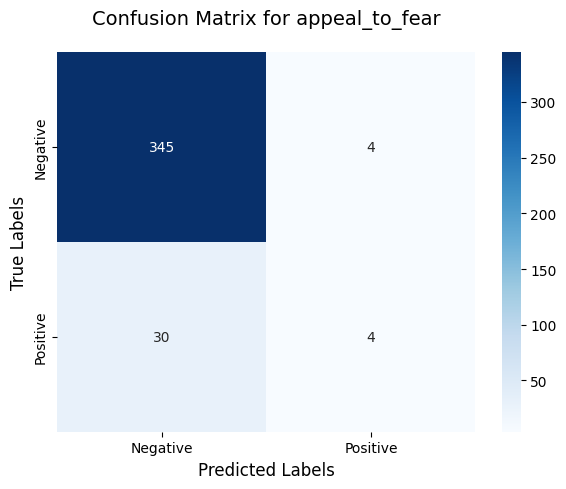

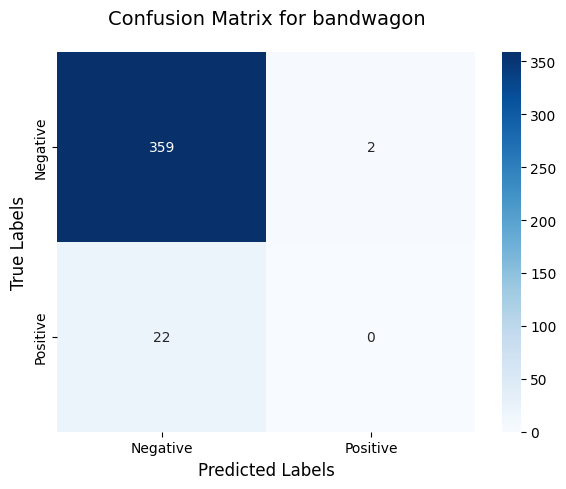

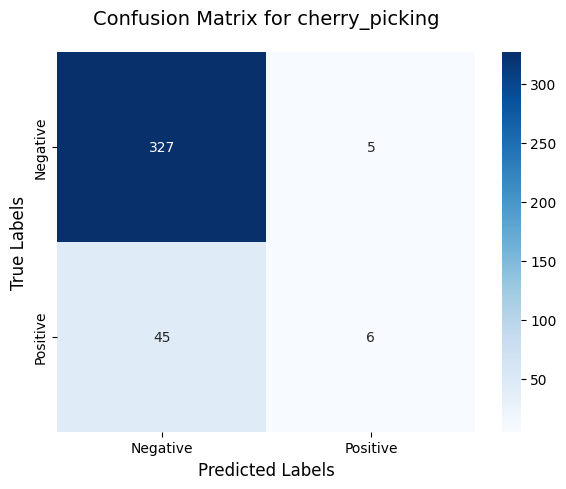

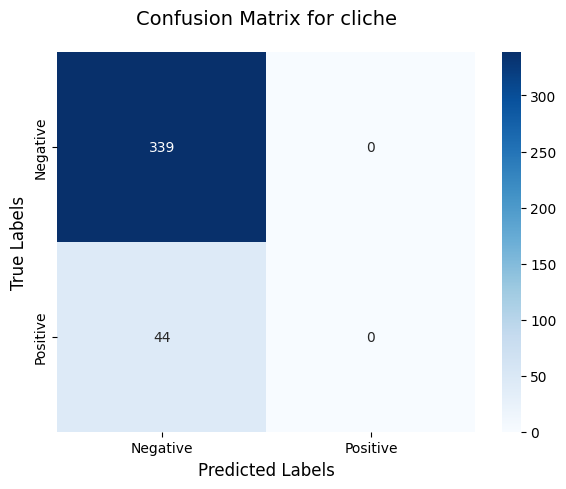

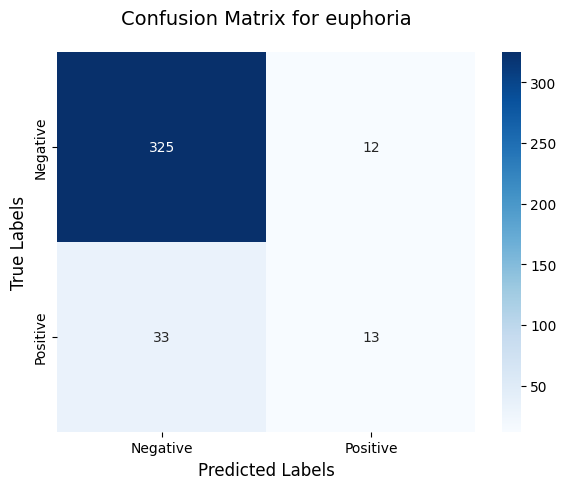

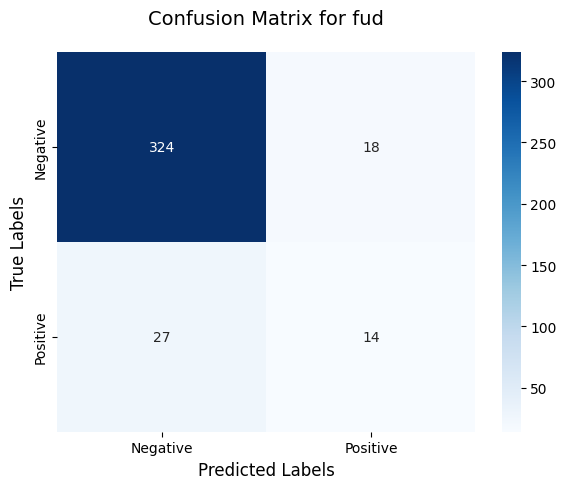

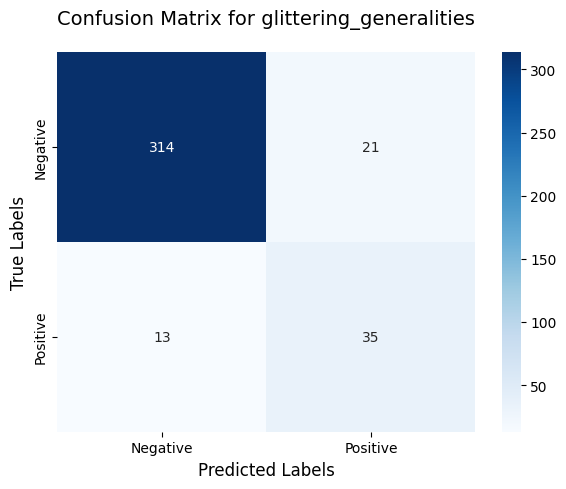

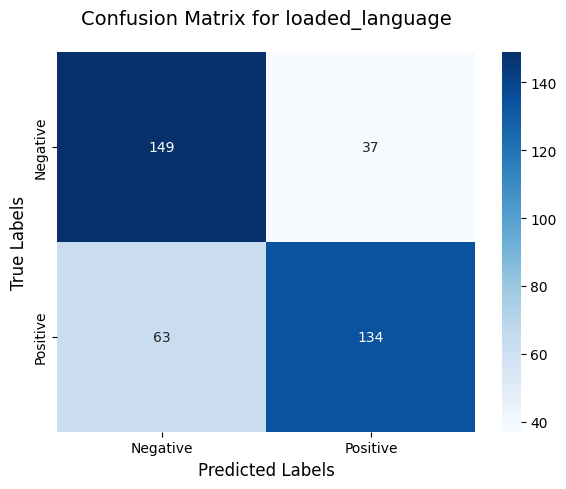

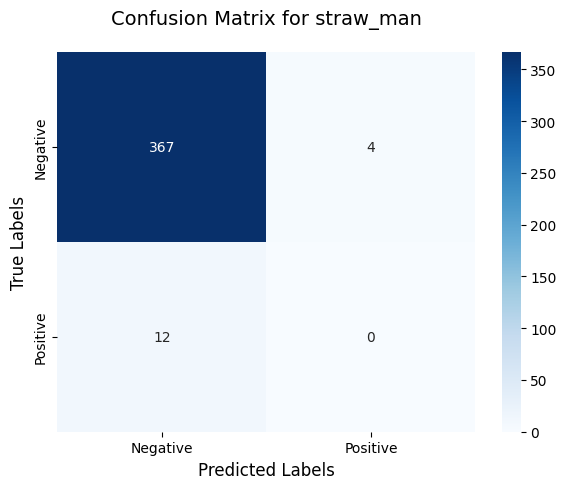

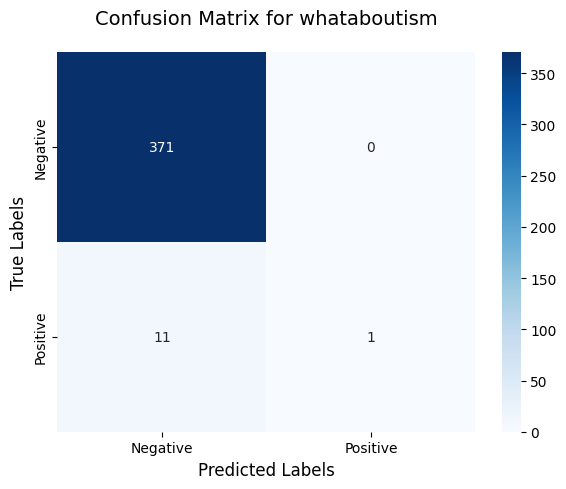

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# Get predictions from the model
predictions = trainer.predict(val_data)

# Convert logits to binary predictions using a threshold (e.g., 0.5)
threshold = 0.3  # You can optimize this threshold if needed
predicted_labels = (predictions.predictions > threshold).astype(int)

# Convert ground truth labels to the same format (if they are not already)
true_labels = np.array(val_labels.tolist())  # Ensure true_labels is a 2D NumPy array

# Compute the multi-label confusion matrix
cm = multilabel_confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix for each class
for i, class_name in enumerate(unique_labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm[i], annot=True, fmt="d", cmap="Blues",
                xticklabels=["Negative", "Positive"],
                yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.title(f"Confusion Matrix for {class_name}", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

In [ ]:
trainer.save_model("/content/drive/MyDrive/Shared_task/try5")


# **Test Portion**

In [ ]:
file_path_test = "/content/drive/My Drive/Shared_Task/test.csv"
test_main = pd.read_csv(file_path_test)
test = test_main.drop(columns=['id'])
test

,content
0,"Они просрали нашу технику, положили кучу людей..."
1,❗️\nКитай предлагает отдать оккупированные тер...
2,Сегодня будет ровно 6 месяцев с этого обещания...
3,⚡️\nІзраїль вперше у світі збив балістичну рак...
4,Склав невелику навчально-методичну таблицю на ...
...,...
5730,Власть заблокировала мой YouTube-канал на терр...
5731,"Мы писали о том, что Ермак считает Залужного п..."
5732,👀\n \nОкремий розділ своїм гейтерам присвятило...
5733,Крымский пропагандистский телеканал НТС призна...


## **RUN THIS IF THE ASSUMPTION IS FROM SAVED DATA**

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Shared_task/try5")

# Initialize the Trainer with the loaded model
trainer = Trainer(model=model)

In [ ]:
from datasets import Dataset

# Convert the 'content' column of the test DataFrame to a list
test_texts_list = test['content'].tolist()  # Correctly convert to a list

# Convert to Hugging Face Dataset format
test_data = Dataset.from_dict({"text": test_texts_list})

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=512)

test_data = test_data.map(tokenize_function, batched=True)

# Set the format for PyTorch
test_data.set_format(type="torch", columns=['input_ids', 'attention_mask'])

Map:   0%|          | 0/5735 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

# Get predictions on the test set
predictions = trainer.predict(test_data)

# Extract logits from predictions
logits = predictions.predictions  # Shape: (num_samples, num_classes)

# Apply sigmoid to convert logits to probabilities
probabilities = 1 / (1 + np.exp(-(logits)))  # Shape: (num_samples, num_classes)

# Apply threshold to get binary predictions
threshold = 0.3
predicted_labels = (probabilities > threshold).astype(int)  # Shape: (num_samples, num_classes)

# Print the first 5 predictions for debugging
print("Predicted labels (first 5 samples):")
print(predicted_labels[:5])


In [ ]:
# Convert predicted_labels to a DataFrame
submission_df = pd.DataFrame(predicted_labels, columns=unique_labels)

# Add the 'id' column from the test data
submission_df.insert(0, 'id', test_main['id'])  # Insert 'id' column at the beginning

In [ ]:
column_order = [
    'id', 'straw_man', 'appeal_to_fear', 'fud', 'bandwagon',
    'whataboutism', 'loaded_language', 'glittering_generalities',
    'euphoria', 'cherry_picking', 'cliche'
]
submission_df = submission_df[column_order]
submission_df.to_csv("/content/drive/MyDrive/Shared_Task/submission5.csv", index=False)